# Import packages

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

For the last exercise of this group session, we propose to look at the problem of polynomial regression on real world data. We will consider the Boston Housing dataset, in which each sample corresponds to a house, whose price is to be infered from a set of 13 features. The purpose of this exercise is to:
- Show that linear models can be used successfuly on real world problems.
- Use linear models in a multi-dimentional setting.
- Get familiar with visualization in the presence of 2 dimensions.

# Loading and visualizing the Boston Housing dataset

1) Load the Boston dataset: store the 13 features in a matrix X and the target price in a vector Y.

2) Investigate the Boston dataset. It is obviously not possible to visualize all the 14 dimensions at the same time, but it may be a good idea to represent the target price as a function of each of the 13 features individually. Hint: To load the dataset, use the 'load_boston()' from 'sklearn.datasets'. You can plot using the 'scatter' function from 'matplotlib.pyplot'.

# Model selection for polynomial regression on the Boston dataset: 2D case

3) Identify 2 features that are continuous and appear to be correlated to the target price. Extract these two features to obtain a simpler features matrix 'X_2D' with only 2 columns.

4) Split and shuffle the dataset into train/validation/test sets. Specify the proportion for each. You can for instance use the 'train_test_split()' function from 'sklearn.model_selection'.

5) Perform a model selection on the degree parameter for the polynomial regression model: in a For loop with varying degree 'd', train and validate a polynomial regression model of degree 'd' on your dataset. You can for instance transform your data in polynomial form using the class 'PolynomialFeatures()' from 'sklearn.preprocessing', then use a linear model using the class 'LinearRegression()' from 'sklearn.linear_model'. Select the best model as the model whose mean-squared error (MSE) is the least when evaluated on the VALIDATION set.

6) Perform a model evaluation of the selected model: train the best model on both the train and the validation sets, then evaluate it on the test set. Note: the test set is only used at the very end of your "pipeline" (AFTER model selection) to assess the ability of the selected model to generalize on UNSEEN data. You should never use the validation set for this purpose, since the validation set was already used to select the best model, thus it is no longer unseen !

7) In the For loop from 5), store both the train and validation MSE values for each degree. Plot the train and validation MSE as functions of the degree. Comment.


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

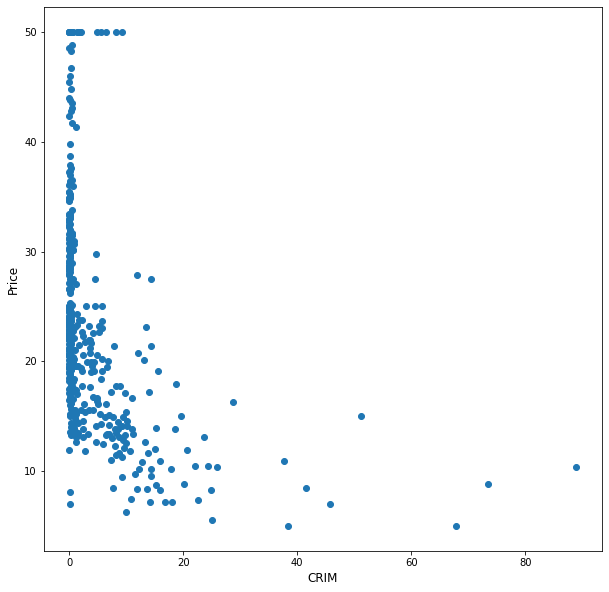

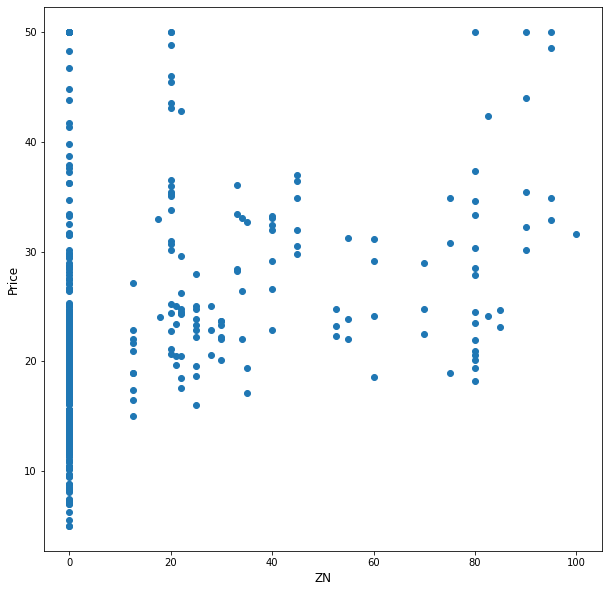

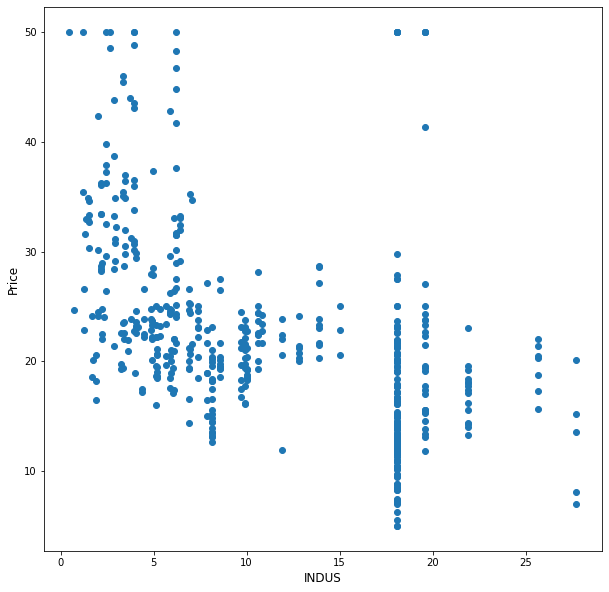

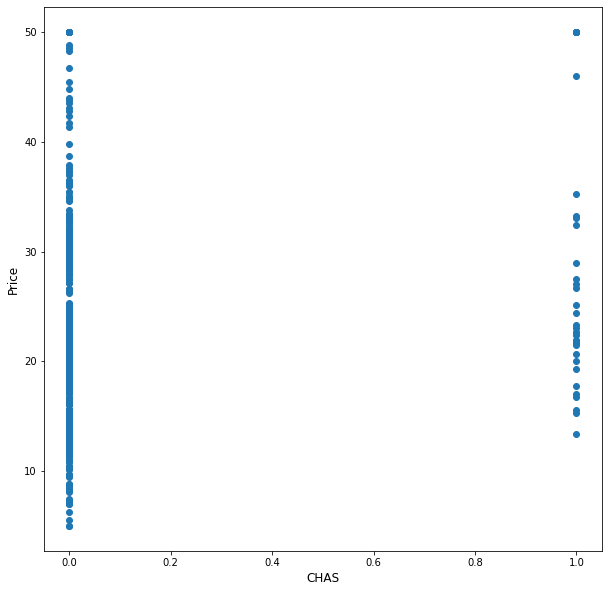

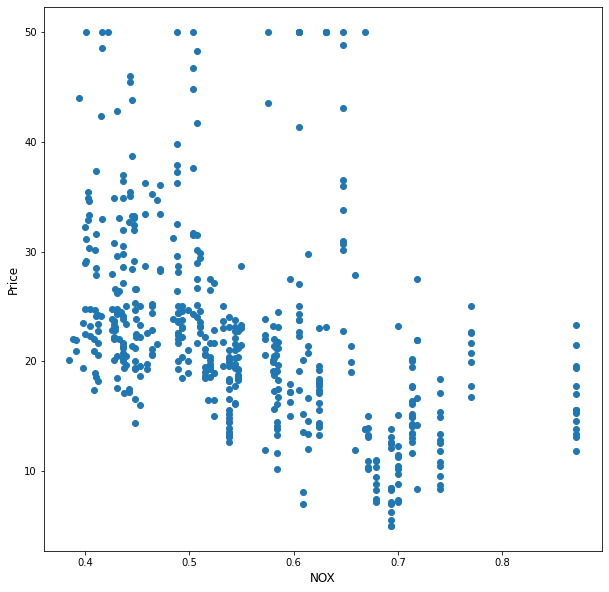

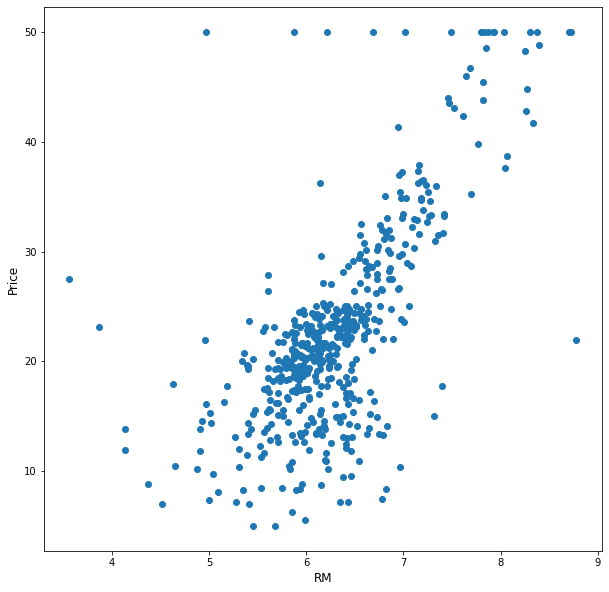

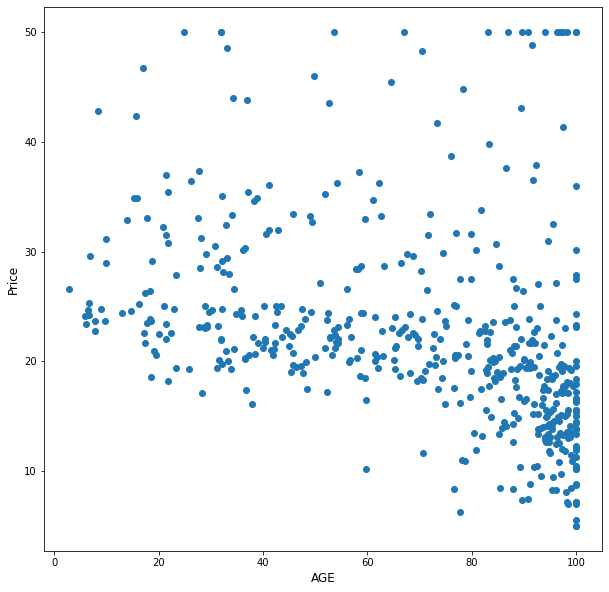

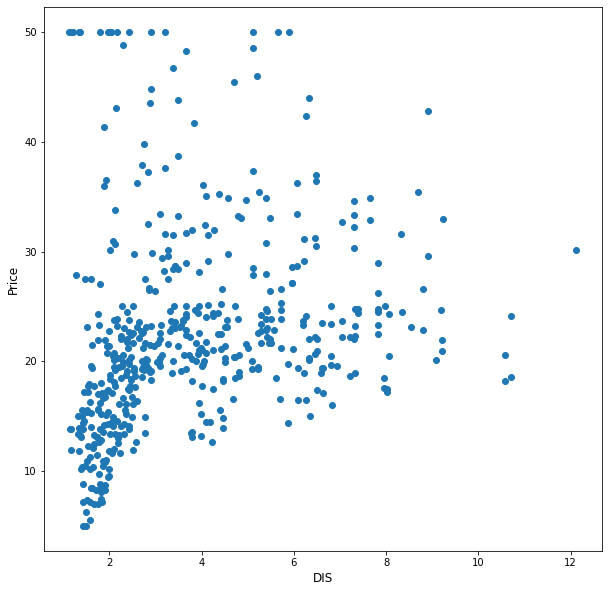

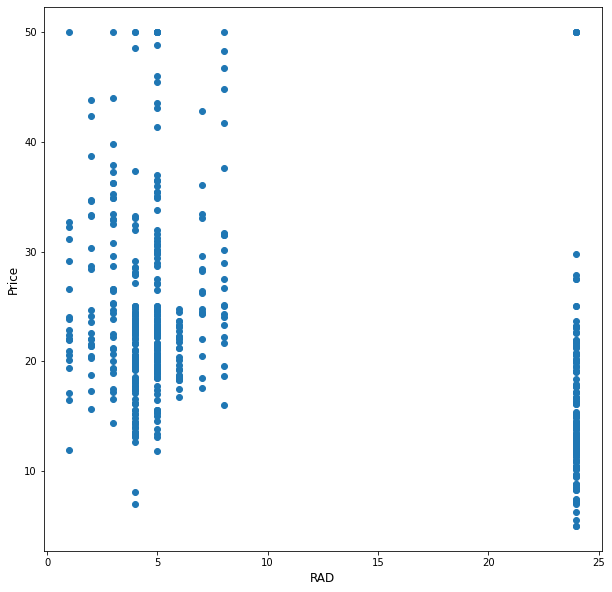

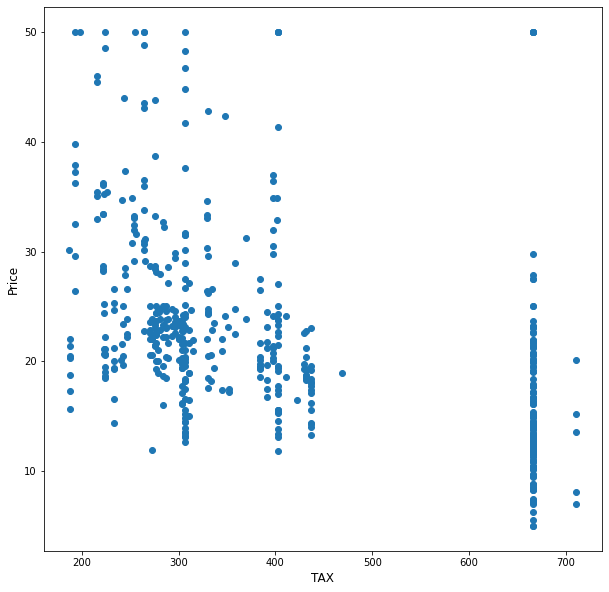

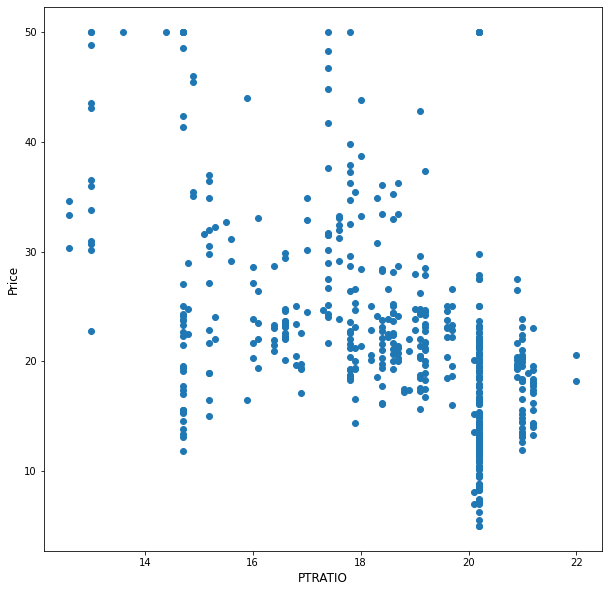

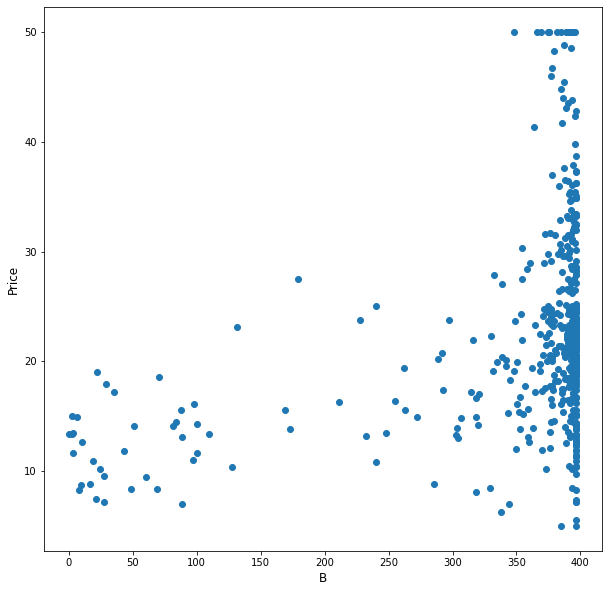

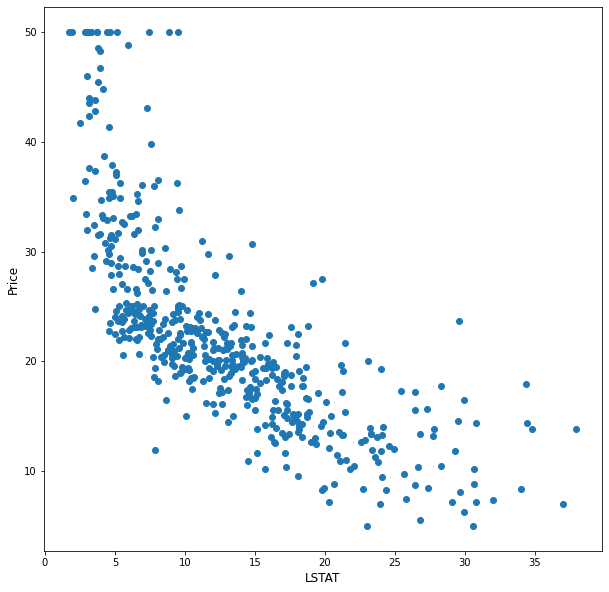

In [76]:
#Loading Boston Dataset and Visualizing
boston = load_boston()
print(boston.DESCR)
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(10, 10), facecolor='w')
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()


In [77]:
# Fixing the seed for reproducibility:
seed = 222
# 3) Selecting two continuous features that are correlated to the target price:
#Using -MEDV     Median value of owner-occupied homes in $1000's
#      -INDUS    proportion of non-retail business acres per town
X_2D = np.column_stack((boston.data[:,2], boston.data[:,12]))
# 4) Splitting and shuffling dataset into train/validation/test sets:


X_train, X_val_test, Y_train, Y_val_test = train_test_split(X_2D, boston.target,      #TODO!
                                       test_size=0.6, #TODO!
                                       shuffle=True,
                                       random_state=seed)

X_val, X_test, Y_train, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5,
                                                  shuffle=True, random_state=seed)

In [88]:
# ----------------------
# Polynomial basis functionss
# ----------------------
def phi_polynomial(X,d):
    """
    Compute polynomial basis functions

    The biais is included in this function
    """
    phi = np.zeros((X.size, (d+1)*2))
    print(phi)
    for j in range(X.size):
        for i in range((d+1)*2):
            phi[j][i] = X[j][1]**(i-(d+1)) if i >= d+1 else X[j][0]**i

    return phi

In [89]:
# 5) Model selection on the degree in polynomial regression:
degrees = [x+1 for x in range(8)] # choose a bunch of interesting values for d]
asd = phi_polynomial(X_train, 2)
print(asd)
val_MSEs = []

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


IndexError: index 202 is out of bounds for axis 0 with size 202

In [ ]:
for degree in degrees:
    val_MSE = ... # TODO: train on the train set then evaluate on the validation set a
                  # polynomial regression model of degree d
    val_MSEs.append(val_MSE)

In [ ]:
# Extracting the best model:
val_MSEs = np.array(val_MSEs)
print("Validation MSEs:")
print(val_MSEs)
best_degree_idx = ...
best_degree = ...
print("\nBest degree:", best_degree)
# 6) Model evaluation:
... # TODO: evaluate on the test set the selected model

# Visualization of underfitting and overfitting

8) Read carefully the functions below. These functions let you visualize 3D plots representing the true data points and the prediction surfaces. This is interesting in order to visually assess whether a model underfits or overfits. Use the 'visualize_2D_polynomial_regression()' function in order to assess which degree values tend to underfit or overfit for your polynomial regression models on the Boston dataset.

In [ ]:
def make_axis(X, step=0.1):
    X_min = np.min(X)
    X_max = np.max(X)
    X_axis = np.arange(X_min, X_max, step)
    return X_axis

In [ ]:
def make_grid(X0, X1):
    X0_axis = make_axis(X0)
    X1_axis = make_axis(X1)
    X0_grid, X1_grid = np.meshgrid(X0_axis, X1_axis)
    return X0_grid, X1_grid

In [ ]:
def predict_grid(model, poly_features, X0_grid, X1_grid):
    original_shape = X0_grid.shape
    X0_grid = np.expand_dims(X0_grid.flatten(), axis=1)
    X1_grid = np.expand_dims(X1_grid.flatten(), axis=1)
    grid = np.concatenate((X0_grid, X1_grid), axis=1)
    grid_poly = poly_features.fit_transform(grid)
    grid_preds = model.predict(grid_poly)
    grid_preds = np.reshape(grid_preds, original_shape)
    return grid_preds

In [ ]:
def visualize(X0_grid, X1_grid, grid_preds, X0, X1, Y, ax, c):
    ax.set_xlim(xmin=np.min(X0), xmax=np.max(X0))
    ax.set_ylim(ymin=np.min(X1), ymax=np.max(X1))
    ax.set_zlim(zmin=np.min(Y), zmax=np.max(Y))
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_zlabel('Target price')
    ax.plot_surface(X0_grid, X1_grid, grid_preds, vmin=np.min(Y), vmax=np.max(Y), cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)
    ax.scatter3D(X0, X1, Y, c=c, edgecolors='k', alpha=0.75, s=24)

In [ ]:
def visualize_2D_polynomial_regression(model, poly_features, X_train, X_eval, Y_train, Y_eval, degree):
    # Generate a grid of feature pairs:
    X0_grid, X1_grid = make_grid(X0=np.concatenate((X_train[:,0], X_eval[:,0]), axis=0),
                                 X1=np.concatenate((X_train[:,1], X_eval[:,1]), axis=0))
    # Predict all feature pairs in the grid with the trained model:
    grid_preds = predict_grid(model, poly_features, X0_grid, X1_grid)
    # Display prediction surface and groundtruth for the train and the evaluation sets:
    fig = plt.figure()
    plt.suptitle("Prediction surface and groundtruth (degree = " + str(degree) + ")")
    # Train set:
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_title("Train set")
    visualize(X0_grid, X1_grid, grid_preds, X0=X_train[:,0], X1=X_train[:,1], Y=Y_train, ax=ax1, c='g')
    # Evaluation_set:
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.set_title("Evaluation set")
    visualize(X0_grid, X1_grid, grid_preds, X0=X_eval[:,0], X1=X_eval[:,1], Y=Y_eval, ax=ax2, c='tab:orange')